   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
--- Linear Regression Evaluation ---
MSE: 0.9131
RMSE: 0.9556
MAE: 0.7265
R²: 0.4545
--- Ridge Regression Evaluation ---
MSE: 0.9119
RMSE: 0.9549
MAE: 0.7269
R²: 0.4552
--- Lasso Regression Evaluation ---
MSE: 1.6957
RMSE: 1.3022
MAE: 1.1257
R²: -0.0131
--- Decision Tree Regressor Evaluation ---
MSE: 1.1282
RMSE: 1.0622
MAE: 0.8419
R²: 0.3259
--- Tuned Ridge Regression Evaluation ---
MSE: 0.9124
RMSE: 0.9552
MAE: 0.7796
R²: 0.4549
--- Tuned Lasso Regression Evaluation ---
MSE: 0.7948
RMSE: 0.8915
MAE: 0.7037
R²: 0.5251
--- Tuned Decision Tree Regressor Evaluation ---
MSE: 1.0354
RMSE: 1.0175
MAE: 0.7776
R²: 0.3814
--- Final Ridge Regression on Test Set Evaluation ---


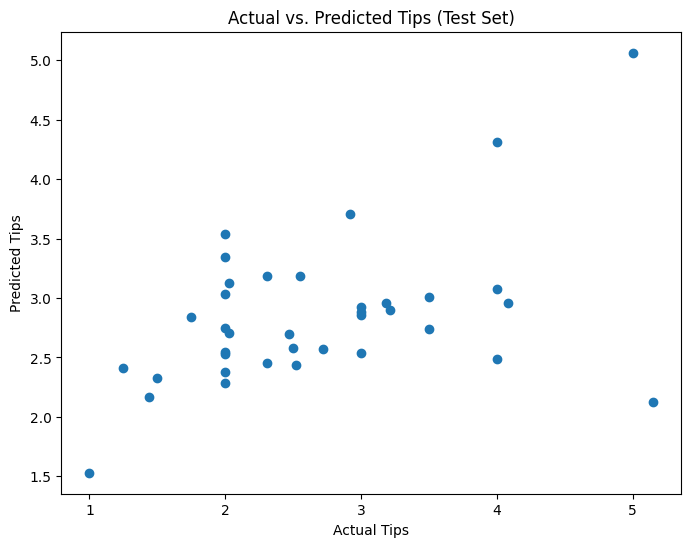

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("/content/tips.csv")
print(data.head())
# 3. Data Preparation
# Handling Missing Values (None found in this dataset)

# Feature Engineering
categorical_features = ['sex', 'smoker', 'day', 'time']
numerical_features = ['total_bill', 'size']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

X = data.drop('tip', axis=1)
y = data['tip']

X_processed = preprocessor.fit_transform(X)

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 4. Base Model Building
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Ridge Regression
ridge = Ridge(random_state=42)
ridge.fit(X_train, y_train)
y_val_pred_ridge = ridge.predict(X_val)

# Lasso Regression
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)
y_val_pred_lasso = lasso.predict(X_val)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_val_pred_dt = dt.predict(X_val)

# 5. Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"--- {model_name} Evaluation ---")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

evaluate_model(y_val, y_val_pred_lr, "Linear Regression")
evaluate_model(y_val, y_val_pred_ridge, "Ridge Regression")
evaluate_model(y_val, y_val_pred_lasso, "Lasso Regression")
evaluate_model(y_val, y_val_pred_dt, "Decision Tree Regressor")

# 6. Hyperparameter Tuning
# Ridge Tuning
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(Ridge(random_state=42), param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_val_pred_best_ridge = best_ridge.predict(X_val)

# Lasso Tuning
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_lasso = GridSearchCV(Lasso(random_state=42), param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_
y_val_pred_best_lasso = best_lasso.predict(X_val)

# Decision Tree Tuning
param_grid_dt = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
y_val_pred_best_dt = best_dt.predict(X_val)

evaluate_model(y_val, y_val_pred_best_ridge, "Tuned Ridge Regression")
evaluate_model(y_val, y_val_pred_best_lasso, "Tuned Lasso Regression")
evaluate_model(y_val, y_val_pred_best_dt, "Tuned Decision Tree Regressor")

# 7. Testing & Final Model
y_test_pred = best_ridge.predict(X_test) # Or another best model

evaluate_model(y_test, y_test_pred, "Final Ridge Regression on Test Set")

# Model Interpretation (Example: Ridge)
print("\nRidge Coefficients:")
if hasattr(best_ridge, 'coef_'):
    print(pd.Series(best_ridge.coef_, index=preprocessor.get_feature_names_out()))
else:
    print("Model does not have coefficients.")

# Visualize Predictions vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs. Predicted Tips (Test Set)")
plt.show()